In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [8]:
# Load datasets
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
submission_sample = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')


In [10]:
# Check the data
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print(train_data.head())

Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  S

In [12]:
# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])


Missing Values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


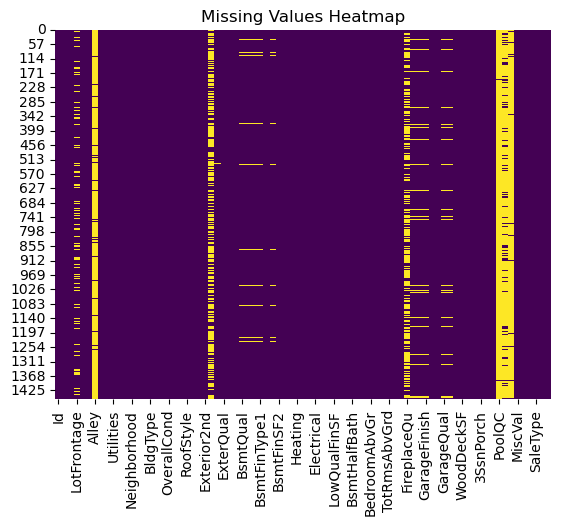

In [14]:
# Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [16]:
# Summary statistics
print(train_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [18]:
# Impute missing numerical values with median
numerical_features = train_data.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    if train_data[feature].isnull().sum() > 0:
        train_data[feature] = train_data[feature].fillna(train_data[feature].median())


In [22]:
# Check for missing values in numerical features
missing_values_numerical = train_data[numerical_features].isnull().sum()

# Display columns with missing values, if any
if missing_values_numerical.sum() == 0:
    print("No missing values in numerical features!")
else:
    print("Missing values in numerical features:")
    print(missing_values_numerical[missing_values_numerical > 0])

No missing values in numerical features!


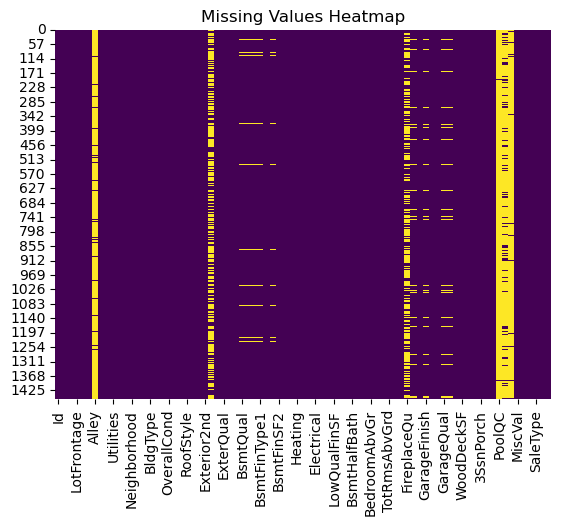

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [26]:
# Impute missing categorical values with mode
categorical_features = train_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if train_data[feature].isnull().sum() > 0:
        train_data[feature] = train_data[feature].fillna(train_data[feature].mode()[0])


In [28]:
# Check for missing values in categorical features
missing_values_categorical = train_data[categorical_features].isnull().sum()

# Display columns with missing values, if any
if missing_values_categorical.sum() == 0:
    print("No missing values in categorical features!")
else:
    print("Missing values in categorical features:")
    print(missing_values_categorical[missing_values_categorical > 0])

No missing values in categorical features!


In [30]:
# Check for missing values in the entire dataset
total_missing_values = train_data.isnull().sum().sum()

if total_missing_values == 0:
    print("All missing values in the dataset have been handled!")
else:
    print(f"Total remaining missing values in the dataset: {total_missing_values}")

All missing values in the dataset have been handled!


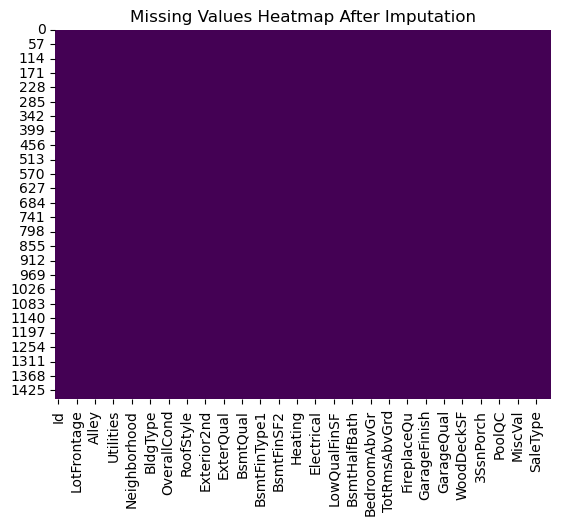

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values in the dataset
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap After Imputation")
plt.show()

In [34]:
# Verify missing values
print("Remaining Missing Values:", train_data.isnull().sum().sum())

Remaining Missing Values: 0


In [36]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [38]:
# Separate target variable
target = 'SalePrice'
X = train_data.drop(columns=[target, 'Id'])  # Dropping 'Id' as it’s not useful for training
y = train_data[target]


In [40]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=[np.number]).columns


In [42]:
categorical_columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [44]:
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [50]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)


In [52]:
# Transform the data
X_processed = preprocessor.fit_transform(X)
print("Transformed Feature Shape:", X_processed.shape)

Transformed Feature Shape: (1460, 244)


In [57]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [59]:
# Linear Regression


from sklearn.linear_model import LinearRegression

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate Linear Regression
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

Linear Regression Results:
MSE: 1.2248961336792115e+23
R²: -15969283451483.49


In [63]:

# Random Forest with GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
print("Random Forest Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

Random Forest Results:
MSE: 853232254.7010562
R²: 0.8887619337621424


In [65]:
# XGBoost with GridSearchCV
xgb_model = XGBRegressor(random_state=42)
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Evaluate XGBoost
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test)
print("XGBoost Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R²: {r2_score(y_test, y_pred_xgb)}")

XGBoost Results:
MSE: 921972274.0702806
R²: 0.8798001220330904


In [67]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb)
    ],
    'R²': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model           MSE            R²
0  Linear Regression  1.224896e+23 -1.596928e+13
1      Random Forest  8.532323e+08  8.887619e-01
2            XGBoost  9.219723e+08  8.798001e-01


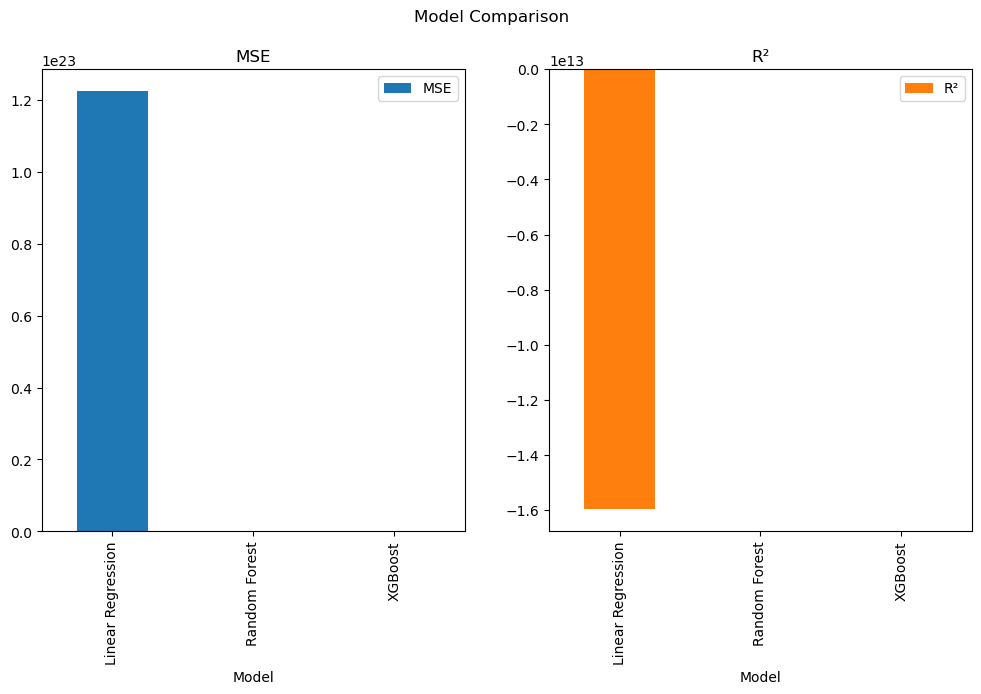

In [69]:
# Visualize results
results_df.plot(x='Model', y=['MSE', 'R²'], kind='bar', subplots=True, layout=(1, 2), figsize=(12, 6))
plt.suptitle("Model Comparison")
plt.show()

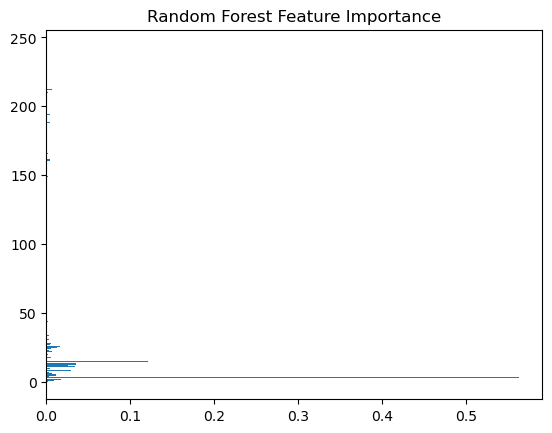

In [71]:
# Feature importance for Random Forest
rf_importances = grid_rf.best_estimator_.feature_importances_
plt.barh(range(len(rf_importances)), rf_importances)
plt.title("Random Forest Feature Importance")
plt.show()



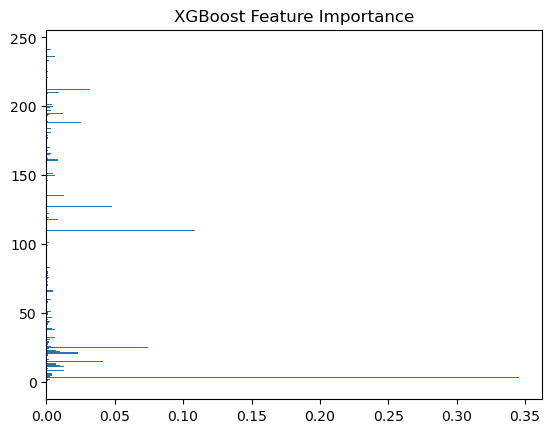

In [73]:
# Feature importance for XGBoost
xgb_importances = grid_xgb.best_estimator_.feature_importances_
plt.barh(range(len(xgb_importances)), xgb_importances)
plt.title("XGBoost Feature Importance")
plt.show()

In [75]:
# Transform test data
X_test_final = test_data.drop(columns=['Id'])
X_test_final_processed = preprocessor.transform(X_test_final)



ValueError: Found unknown categories [nan] in column 0 during transform

In [77]:
# Fill missing values for numerical features in the test dataset
numerical_features_test = test_data.select_dtypes(include=[np.number]).columns
for feature in numerical_features_test:
    if test_data[feature].isnull().sum() > 0:
        test_data[feature] = test_data[feature].fillna(train_data[feature].median())  # Use training data's median



In [83]:
# Check for missing values in numerical features
missing_values_numerical1 = test_data[numerical_features_test].isnull().sum()

# Display columns with missing values, if any
if missing_values_numerical1.sum() == 0:
    print("No missing values in numerical features!")
else:
    print("Missing values in numerical features:")
    print(missing_values_numerical1[missing_values_numerical1 > 0])

No missing values in numerical features!


In [81]:
# Fill missing values for categorical features in the test dataset
categorical_features_test = test_data.select_dtypes(include=['object']).columns
for feature in categorical_features_test:
    if test_data[feature].isnull().sum() > 0:
        test_data[feature] = test_data[feature].fillna(train_data[feature].mode()[0])  # Use training data's mode

In [85]:
# Check for missing values in categorical features
missing_values_categorical1 = test_data[categorical_features_test].isnull().sum()

# Display columns with missing values, if any
if missing_values_categorical1.sum() == 0:
    print("No missing values in categorical features!")
else:
    print("Missing values in categorical features:")
    print(missing_values_categorical1[missing_values_categorical1 > 0])

No missing values in categorical features!


In [87]:
# Check if all missing values are handled
print("Missing values in test_data:", test_data.isnull().sum().sum())

Missing values in test_data: 0


In [89]:
# Drop the 'Id' column from the test dataset (if not needed for prediction)
X_test_final = test_data.drop(columns=['Id'])

# Transform the test data
X_test_final_processed = preprocessor.transform(X_test_final)

print("Test data processed successfully!")

Test data processed successfully!


In [91]:
# Predict using the best model (XGBoost)
test_predictions = grid_xgb.best_estimator_.predict(X_test_final_processed)



In [93]:
# Prepare submission file
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file created!")

Submission file created!
